

## import packages and prepare data



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip -q install pyreadstat
!wget -q https://www.dropbox.com/s/7rd15y2jdam5wls/carsales.sav
!wget -q https://www.dropbox.com/s/0ctjebkulbqv23z/Professional_Sales_Applicants.sav

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 2.0MB 8.1MB/s 


In [2]:
df= pd.read_spss('carsales.sav')
test= pd.read_spss("Professional_Sales_Applicants.sav")

In [3]:
# Check null values
df.isnull().sum()
# We can see there're 141 observations have null values.

CandidateID                    141
AgeBand                          0
Race                             0
Gender                           0
QualityofHirePoint               0
OverallRating                   66
Accommodation_tile             141
Assertiveness_tile             141
CautiousThinking_tile          141
Competitiveness_tile           141
CriticismTolerance_tile        141
DetailInterest_tile            141
FollowThrough_tile             141
InterpersonalInsight_tile      141
Multitasking_tile              141
ObjectiveThinking_tile         141
Optimism_tile                  141
PositiveViewofPeople_tile      141
PreferenceforStructure_tile    141
ProcessFocused_tile            141
WorkIntensity_tile             141
RealisticThinking_tile         141
ReflectiveThinking_tile        141
Sociability_tile               141
SocialRestraint_tile           141
WorkIndependence_tile          141
dtype: int64

In [4]:
# remove null values
df=df.dropna()
test=test.dropna()

## Visualization

In [5]:
sns.set_context("talk", rc={"font.size":15,"axes.titlesize":25,"axes.labelsize":15}) 
sns.set_style(style='ticks')

## OverallRating

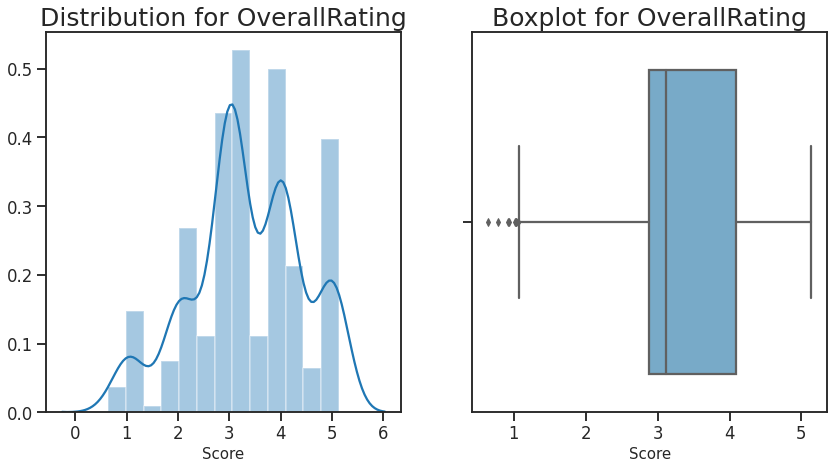

In [17]:
f,ax=plt.subplots(1,2,figsize=(14,7))
sns.distplot(df['OverallRating'],ax=ax[0])
ax[0].set_title('Distribution for OverallRating')
ax[0].set_xlabel('Score')

sns.boxplot(x=df["OverallRating"],ax=ax[1],palette='Blues')
ax[1].set_title('Boxplot for OverallRating')
ax[1].set_xlabel('Score')

plt.show()

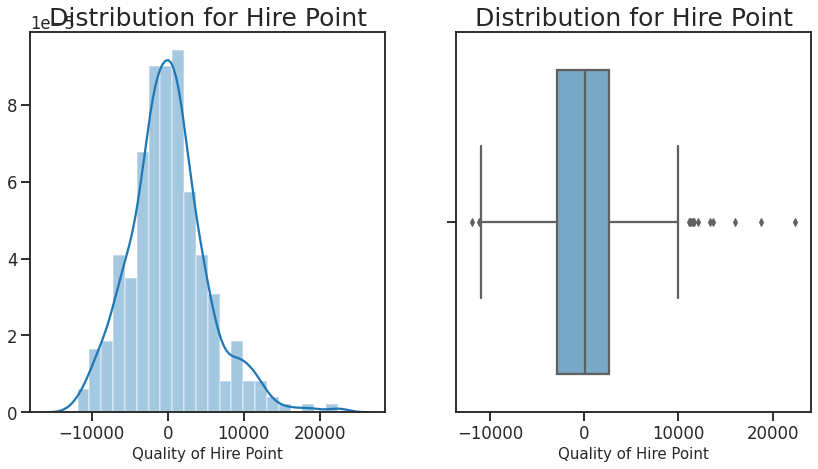

In [16]:
f,ax=plt.subplots(1,2,figsize=(14,7))
sns.distplot(df['QualityofHirePoint'],ax=ax[0])
ax[0].set_title('Distribution for Hire Point')
ax[0].set_xlabel('Quality of Hire Point')

sns.boxplot(x=df['QualityofHirePoint'],ax=ax[1],palette='Blues')
ax[1].set_title('Distribution for Hire Point')
ax[1].set_xlabel('Quality of Hire Point')

plt.show()

## Protected attributes

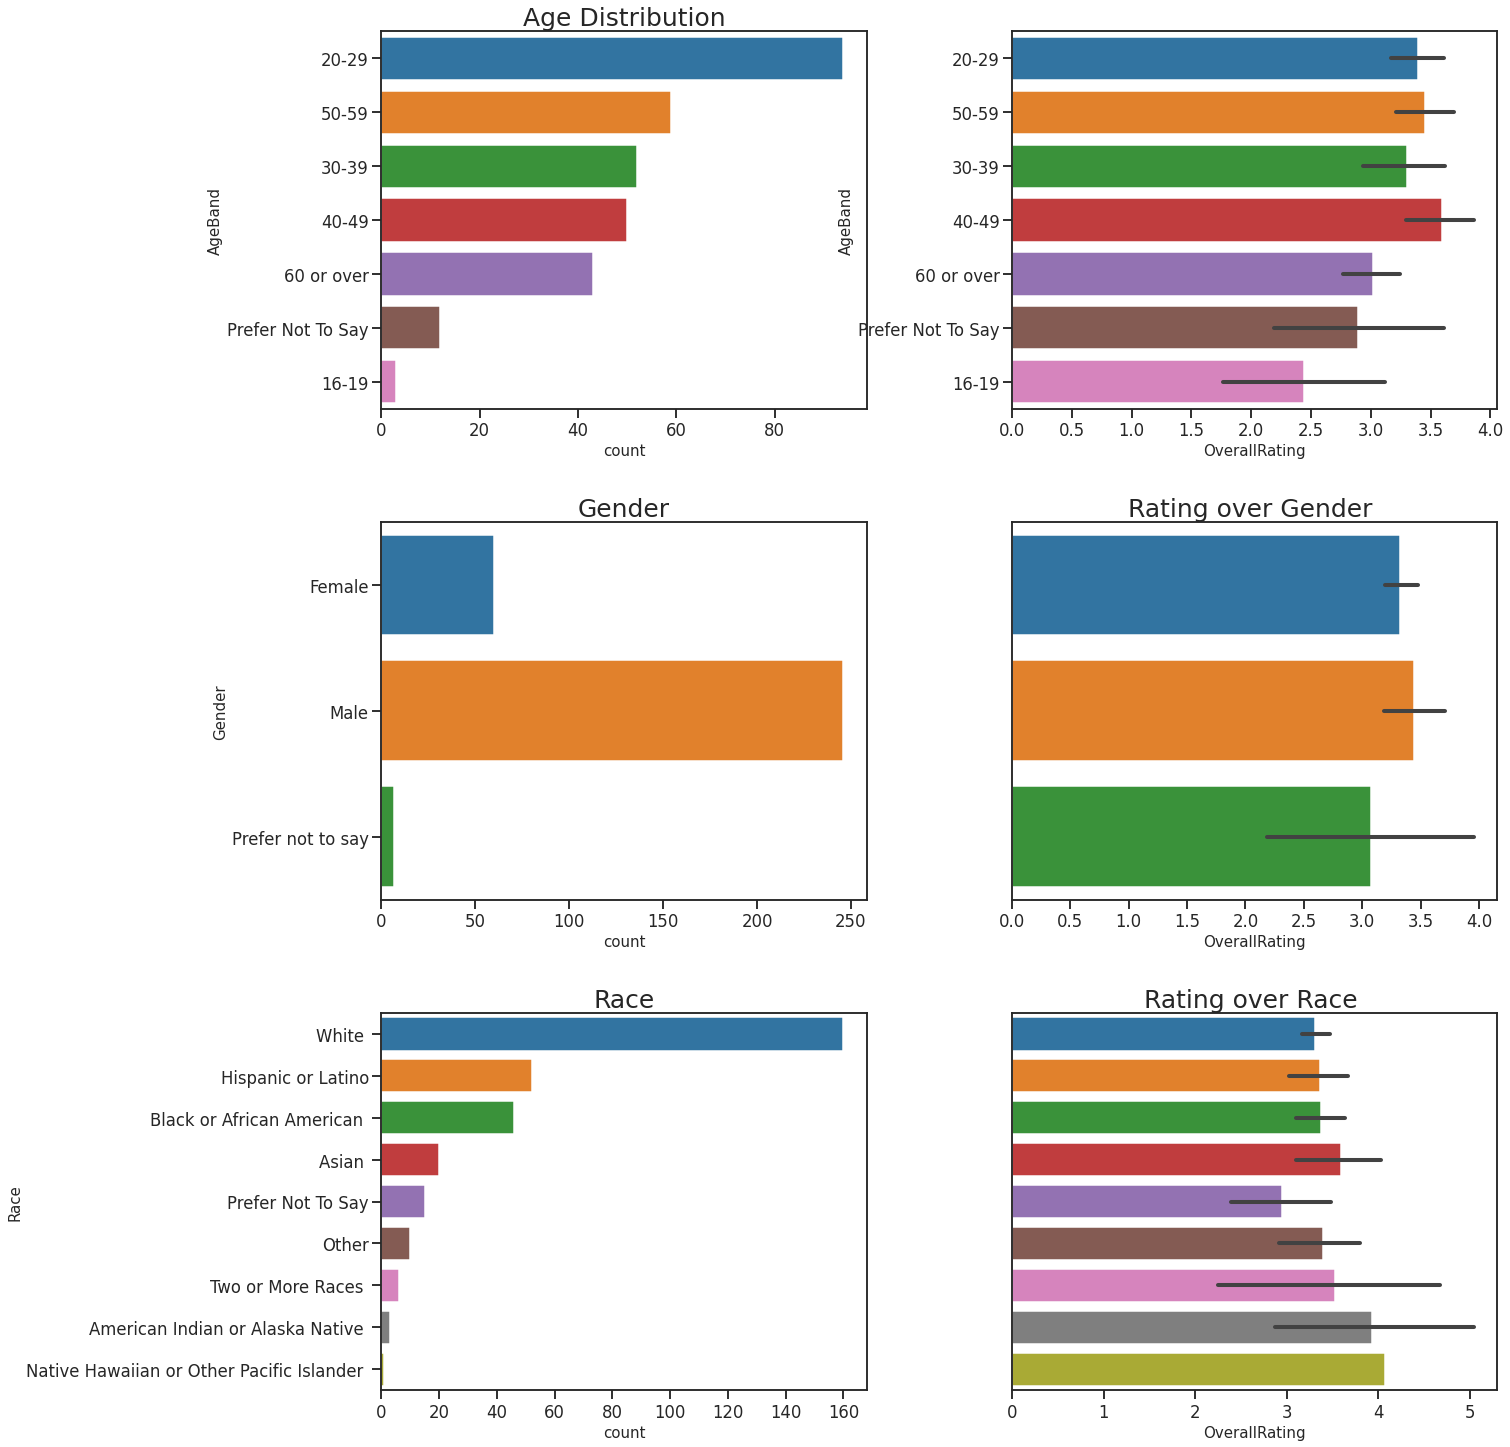

In [27]:
# Remove replicate string from race categories
df.Race=df['Race'].str.replace('not Hispanic or Latino','')
df.Race=df.Race.str.strip('()')

#Bar chart 
f,ax=plt.subplots(3,2,figsize=(20,25))
sns.countplot(y='AgeBand',data=df,ax=ax[0,0],order=df['AgeBand'].value_counts().index)
ax[0,0].set_title('Age Distribution')

sns.barplot(y="AgeBand", x="OverallRating", data=df, ax=ax[0,1],order=df['AgeBand'].value_counts().index)
ax[1,1].set_yticks([])
ax[1,1].set_ylabel('')
ax[1,1].set_title('Rating over Age ')

count=sns.countplot(y='Gender',data=df,ax=ax[1,0])
ax[1,0].set_title('Gender')

sns.barplot(y="Gender", x="OverallRating", data=df, ax=ax[1,1],order=df['Gender'].value_counts().index)
ax[1,1].set_yticks([])
ax[1,1].set_ylabel('')
ax[1,1].set_title('Rating over Gender ')

sns.countplot(y='Race',data=df,ax=ax[2,0],order=df['Race'].value_counts().index)
ax[2,0].set_title('Race')

sns.barplot(y="Race", x="OverallRating", data=df, ax=ax[2,1],order=df['Race'].value_counts().index)
ax[2,1].set_yticks([])
ax[2,1].set_ylabel('')
ax[2,1].set_title('Rating over Race ')

plt.subplots_adjust(hspace = 0.3, wspace=0.3)
plt.show()

## Other exploratory plot

Text(0.5, 1.0, 'The Age Distribution For Men and Women')

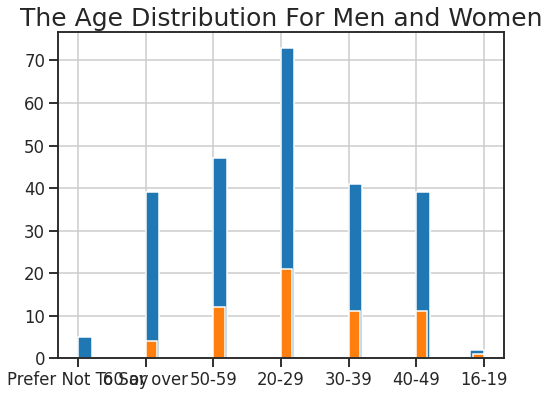

In [28]:
female_w = df[df['Gender']=='Female']['AgeBand'].dropna()
male_w = df[df['Gender']=='Male']['AgeBand'].dropna()
fig = plt.figure(figsize=(8,6))
male_w.hist(bins=30)
female_w.hist(bins=30)
plt.title('The Age Distribution For Men and Women')

Text(0.5, 1.0, 'Gender in Rating & Hire Point')

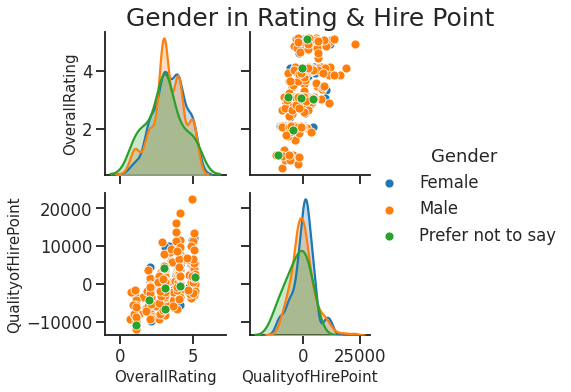

In [33]:
# Pair Plot of Gender with OverallRating and Qualityof HirePoint
new_df = df[['OverallRating','QualityofHirePoint','Gender']]
g= sns.pairplot(data = new_df, hue="Gender")
plt.title('Gender in Rating & Hire Point')